# ✅ 사본을 만들어 과제를 수행해주세요.

본 실습은 빈칸을 채워 코드를 완성시키는 문제와 주관식 답변 문제로 이루어져 있습니다.
실습 관련한 질문은 언제든 편하게 해주세요.

# 💡 ML 과제: 선형 회귀 모델 학습

실습 목표

1. 선형 회귀 모델(Ridge)을 정의하고 학습하는 방법을 이해합니다.

2. GridSearchCV를 활용하여 하이퍼파라미터를 탐색하는 방법을 배웁니다.

3. 예측 결과에 대한 평균제곱오차(MSE)와 결정계수(R²)를 계산하여 모델 성능을 평가합니다.



**0. Import**

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import make_regression

**1. 데이터 생성**

In [2]:
X, y = make_regression(n_samples=200, n_features=5, noise=15, random_state=42)

df = pd.DataFrame(X, columns=[f'feature_{i}' for i in range(X.shape[1])])
df['target'] = y

**2. Train-test split**

train : test = 0.8:0.2로 분리될 수 있도록 빈칸을 채워 코드를 완성해주세요.

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size= 0.2 , random_state=42
)

**3. 모델 정의**

In [5]:
ridge = Ridge()

**4. Grid Search (하이퍼파라미터 튜닝)**

❓ 빈칸을 채워 코드를 완성하고 각 하이퍼파라미터들이 의미하는 것이 무엇인지 작성해주세요.

참고: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

답변:

In [6]:
param_grid = {
    'alpha': [0.01, 0.1, 1.0, 10.0, 100.0]
}

grid_search = GridSearchCV(      #그리드 서치 : 하이퍼파라미터 후보 모드 조합
    estimator=Ridge(),           # 사용할 모델 : Ridge 회귀모델을 사용한다는 뜻
    param_grid=param_grid,       # 탐색할 하이퍼파라미터 그리드
    scoring='neg_mean_squared_error',  #모델 성능을 평가할 지표 : 민스퀘어에러mse를 사용한다는 뜻
    cv=5                         # 5겹 교차 검증 cross validation -> cv
)

grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.01, 0.1, 1.0, 10.0, 100.0]},
             scoring='neg_mean_squared_error')

**5. 최적 모델 평가**

빈칸을 채워 코드를 완성해주세요.

In [10]:
print("y 최소값:", y.min())
print("y 최대값:", y.max())
print("y 평균:", y.mean())
print("y 표준편차:", y.std())


y 최소값: -329.1156352632058
y 최대값: 286.78496692935516
y 평균: 5.225744557713219
y 표준편차: 97.05250159701953


In [8]:
print("최적의 하이퍼파라미터:", grid_search.best_params_)

best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)  #모델 학습

print("MSE:", mean_squared_error(y_test, y_pred))
print("R² score:", r2_score(y_test, y_pred))

최적의 하이퍼파라미터: {'alpha': 0.1}
MSE: 191.13669584366232
R² score: 0.9780011857389037


❓ 모델의 성능을 MSE값과 R²을 바탕으로 평가해주세요.

답변: RMSE가 13.82로 타겟 데이터 표준편차인 97.05의 약 14% 수준에 불과하여 모델의 예측이 실제 값 주변에서 ±14% 정도의 오차로 이루어지고 있음을 알 수 있습니다. 이는 모델이 타겟 값의 변동을 매우 잘 설명하고 있다는 의미입니ㄷ. 또한 R² score가 0.978로 결정계수가 0.97 이상이므로 모델이 데이터 변동의 약 97.8%를 설명할 수 있음을 나타냅니다. 이러한 결과는 모델이 높은 설명력을 가지며 과적합 없이 우수한 성능을 보이고 있음을 보여줍니다다.

❓ Grid Search이외에 다른 하이퍼파라미터 튜닝 기법으로는 어떤게 있는지 설명해주세요.

답변: 랜덤 서치가 있습니다. 그리드 서치는 모든 페어를 다 서치하는 반면 랜덤서치는 일부 페어만 무작위로 서치합니다. 빠른 탐색이 가능합니다.
베이지안 최적화도 있습니다. 이전 탐색 결과를 기반으로 성능이 좋을 가능성이 높은 영역을 우선 탐색하는 방식입니다. 효율적인 탐색이 가능합니다

# 💡 DL 과제: Fashion-MNIST CNN 모델 구현

실습 목표

1. Fashion-MNIST 데이터셋의 특징을 이해하고 구조를 파악합니다.

2. CNN 모델을 직접 구현하면서 합성곱 연산 및 출력 크기 계산을 실습합니다.

3. Stride, padding, 필터 개수 등 하이퍼파라미터가 출력 형태에 미치는 영향을 학습합니다.

4. Batch Normalization을 적용하는 방법을 실습합니다.

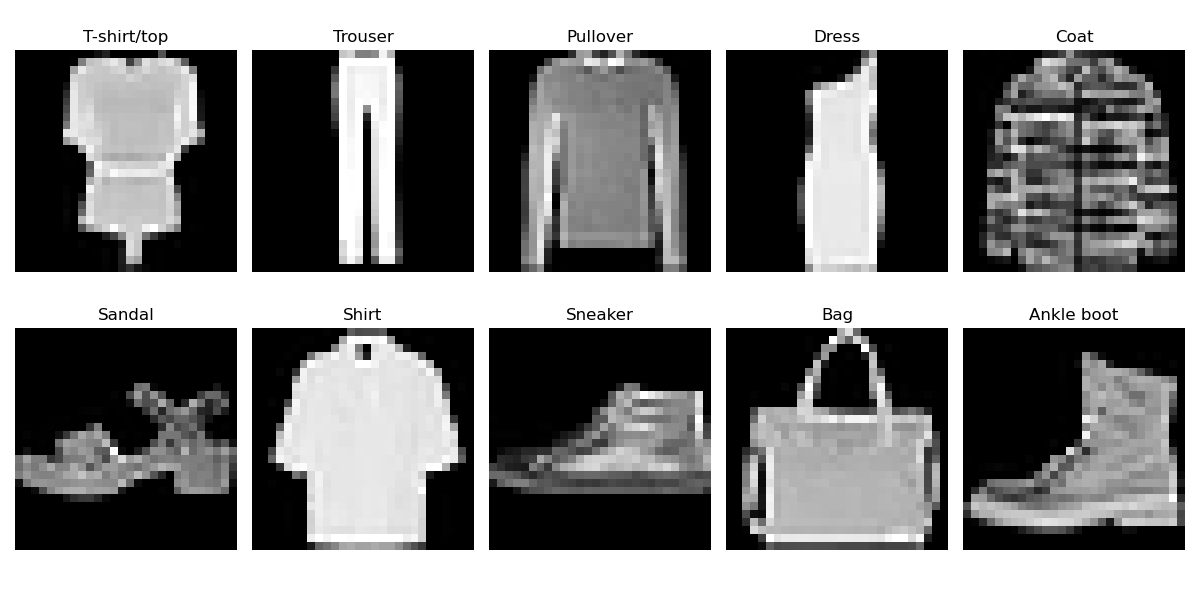

✅ Fashion-MNIST란?Fashion-MNIST는 Zalando에서 공개한 의류 이미지 데이터셋으로, 기존 MNIST 손글씨 숫자 데이터셋의 대체를 목표로 개발되었습니다. 총 10개 카테고리(티셔츠, 바지, 코트 등)로 구성된 흑백 이미지(28x28 픽셀)로 이루어져 있으며, 딥러닝 모델의 성능을 테스트하기 위한 벤치마크 데이터로 널리 사용되고 있습니다.


✅모델을 빠르게 학습하기 위해 GPU를 사용하는 것이 좋습니다. Google Colab에서는 다음과 같이 설정할 수 있습니다.

메뉴 → 런타임 → 런타임 유형 변경 → 하드웨어 가속기: GPU 선택 → 저장

**0. Import**

In [11]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import torch.optim as optim

**1. 데이터 전처리**

In [12]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

train_dataset = torchvision.datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=64, shuffle=False)

100%|██████████| 26.4M/26.4M [00:02<00:00, 12.8MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 203kB/s]
100%|██████████| 4.42M/4.42M [00:01<00:00, 3.81MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 11.5MB/s]


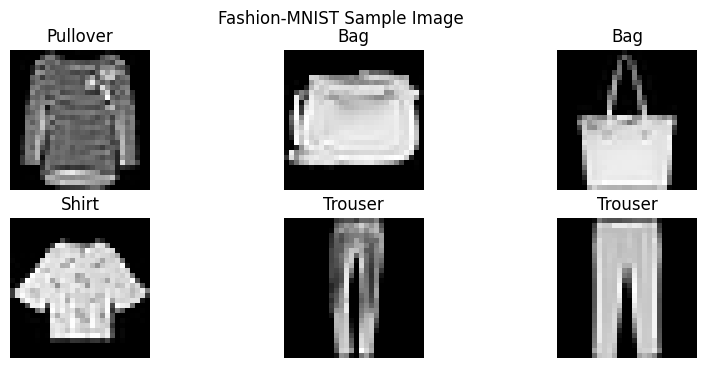

In [13]:
# 이미지 확인

classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
           'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# 샘플 이미지 6개 시각화
examples = iter(train_loader)
images, labels = next(examples)

plt.figure(figsize=(10,4))
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(images[i][0], cmap='gray')
    plt.title(classes[labels[i]])
    plt.axis('off')
plt.suptitle('Fashion-MNIST Sample Image')
plt.show()

**2. CNN 모델 설계**

아래 조건에 맞게 코드를 완성시켜주세요.

        # Conv Layer 1: 입력 채널 1, 출력 채널 16, 필터 3x3, stride=1, padding=1
        # Conv Layer 2: 입력 16, 출력 32, 필터 3x3, stride=2, padding=1
        # Conv Layer 3: 입력 32, 출력 64, 필터 3x3, stride=2, padding=1
        # 각각의 Conv Layer 이후 Batchnorm 을 적용하고 activation function으로 ReLU를 사용
        # 출력 층(FC) 뉴런의 개수는 10개 (클래스가 10개이기 때문)
        # optimizer는 Adam을 사용

In [14]:
import torch.nn as nn
import torch.nn.functional as F

class FashionCNN(nn.Module):
    def __init__(self):
        super(FashionCNN, self).__init__()

        # Conv Layer 1: 입력 채널 1, 출력 채널 16, 필터 3x3, stride=1, padding=1
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=16, kernel_size=3, stride=1, padding=1)
        self.bn1 = nn.BatchNorm2d(16)

        # Conv Layer 2: 입력 16, 출력 32, 필터 3x3, stride=2, padding=1
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, stride=2, padding=1)
        self.bn2 = nn.BatchNorm2d(32)

        # Conv Layer 3: 입력 32, 출력 64, 필터 3x3, stride=2, padding=1
        self.conv3 = nn.Conv2d(32, 64, kernel_size=3, stride=2, padding=1)
        self.bn3 = nn.BatchNorm2d(64)

        # Fully Connected Layer
        # 입력 크기 계산: FashionMNIST (28x28) → Conv1 유지 (28x28) → Conv2 (14x14) → Conv3 (7x7)
        self.fc1 = nn.Linear(64 * 7 * 7, 128)
        self.fc2 = nn.Linear(128, 10)  # 클래스 10개 출력

    def forward(self, x):
        x = F.relu(self.bn1(self.conv1(x)))
        x = F.relu(self.bn2(self.conv2(x)))
        x = F.relu(self.bn3(self.conv3(x)))

        x = x.view(x.size(0), -1)  # Flatten

        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x


**3. 학습 설정**

적절한 손실함수와 조건에 맞는 optimizer를 사용해주세요.

In [15]:
model = FashionCNN()

# 손실 함수: 다중 클래스 분류 문제이므로 CrossEntropyLoss 사용
criterion = nn.CrossEntropyLoss()

# Optimizer: Adam 사용 (조건에 맞게 설정)
optimizer = optim.Adam(model.parameters(), lr=0.001)

# GPU 사용 여부 설정
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)


FashionCNN(
  (conv1): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (bn2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (bn3): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc1): Linear(in_features=3136, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)

In [16]:
def train(model, loader, optimizer, criterion, device):
    model.train()
    running_loss = 0.0

    for images, labels in loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    return running_loss / len(loader)

In [17]:
def evaluate(model, loader, device):
    model.eval()
    correct = 0
    total = 0

    with torch.no_grad():
        for images, labels in loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    return correct / total

**4. 모델 학습**

In [18]:
num_epochs = 10
for epoch in range(num_epochs):
    train_loss = train(model, train_loader, optimizer, criterion, device)
    test_acc = evaluate(model, test_loader, device)
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {train_loss:.4f}, Test Accuracy: {test_acc:.4f}")

Epoch 1/10, Loss: 0.3553, Test Accuracy: 0.8901
Epoch 2/10, Loss: 0.2370, Test Accuracy: 0.9042
Epoch 3/10, Loss: 0.1918, Test Accuracy: 0.9113
Epoch 4/10, Loss: 0.1587, Test Accuracy: 0.9152
Epoch 5/10, Loss: 0.1303, Test Accuracy: 0.9182
Epoch 6/10, Loss: 0.1050, Test Accuracy: 0.9169
Epoch 7/10, Loss: 0.0847, Test Accuracy: 0.9192
Epoch 8/10, Loss: 0.0679, Test Accuracy: 0.9185
Epoch 9/10, Loss: 0.0556, Test Accuracy: 0.9185
Epoch 10/10, Loss: 0.0448, Test Accuracy: 0.9137


❓ **최종 Accuracy는?**

답변: 91.37%

❓ **CNN의 구조를 간략하게 설명하세요.**

답변: 이미지 → Convolution & ReLU & BatchNorm 반복 → Flatten → Fully Connected Layer → 출력